[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 3, 4, 5, 6, 7, 8]
[0, 2, 3, 5, 6, 7, 8]
[0, 2, 3, 5, 7, 8]
[0, 2, 3, 5, 7]
[0, 2, 3, 7]
[0, 2, 7]
[0, 7]
[0]
Out of sample error versus attribute set size
[0.72342592551162754, 0.68609931528371959, 0.67343650334202776, 0.66770332138977961, 0.66225585685222721, 0.65900047541546258, 0.65727172061430783, 0.65709058062076975, 0.65699930964461373, 0.65758189400434697, 0.65739098690113396]

Best attribute indices
[10, 1, 9, 4, 6, 8, 5, 3, 2, 7, 0]

Best attribute names
['"alcohol"', '"volatile acidity"', '"sulphates"', '"chlorides"', '"total sulfur dioxide"', '"pH"', '"free sulfur dioxide"', '"residual sugar"', '"citric acid"', '"density"', '"fixed acidity"']


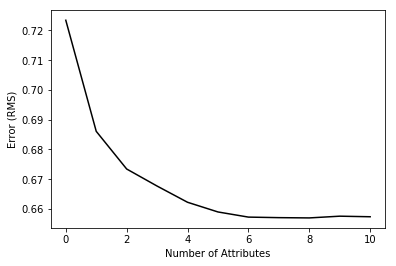

In [31]:
from urllib.request import urlopen
import numpy as np
from sklearn.linear_model import LinearRegression
from math import sqrt
import matplotlib.pyplot as plt

def xatterSelect(x,idxSet):
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)

target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

data = urlopen(target_url)
xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        line = line.decode('utf-8')
        names = line.strip().split(";")
        firstLine = False
    else:
        
        line = line.decode('utf-8')
        row = line.strip().split(";")
        labels.append(float(row[-1]))
        row.pop()
        floatrow = [float(num) for num in row]
        xList.append(floatrow)
        
#print(xList)
#print(labels)
#print(names)

indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0]
xListTrain = [xList[i] for i in indices if i%3 != 0]
yListTest = [labels[i] for i in indices if i%3 == 0]
yListTrain = [labels[i] for i in indices if i%3 != 0]

# build list of attributes one-at-a-time starting with empty
attributeList = []
index = range(len(xList[1]))
indexset = set(index)
#print(indexset)
indexSeq = []
oosError = []

for i in index:
    attset = set(attributeList)
    attTrySet = indexset - attset
    attTry = [ii for ii in attTrySet]
    print(attTry)
    errorList = []
    attTemp = []
    
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        xTrainTemp = xatterSelect(xListTrain,attTemp)
        xTestTemp = xatterSelect(xListTest,attTemp)
        #print(xTestTemp)
        xTrain = np.array(xTrainTemp)
        xTest = np.array(xTestTemp)
        yTrain = np.array(yListTrain)
        yTest = np.array(yListTest)
        
        wineQModel = LinearRegression()
        wineQModel.fit(xTrain,yTrain)
        rmsError = np.linalg.norm((yTest-wineQModel.predict(xTest)),2)/sqrt(len(yTest))
        errorList.append(rmsError)
        attTemp = []
    iBest = np.argmin(errorList)
    attributeList.append(attTry[iBest])
    oosError.append(errorList[iBest])

print("Out of sample error versus attribute set size")
print(oosError)
print("\n" + "Best attribute indices")
print(attributeList)
namesList = [names[i] for i in attributeList]
print("\n" + "Best attribute names")
print(namesList)

# plot error versus number of attributes
x = range(len(oosError))
plt.plot(x,oosError,'k')
plt.xlabel('Number of Attributes')
plt.ylabel('Error (RMS)')
plt.show()

8


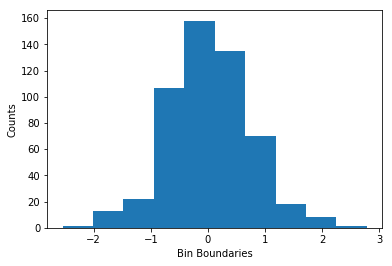

In [36]:
# plot histogram of out of sample errors for best number of attributes
indexBest = oosError.index(min(oosError))
print(indexBest)

attributesBest = attributeList[1:(indexBest+1)]
xTrainTemp = xatterSelect(xListTrain,attributesBest)
xTestTemp = xatterSelect(xListTest,attributesBest)
xTrain = np.array(xTrainTemp)
xTest = np.array(xTestTemp)

wineQModel = LinearRegression()
wineQModel.fit(xTrain,yTrain)
errorvector = yTest - wineQModel.predict(xTest)
plt.hist(errorvector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

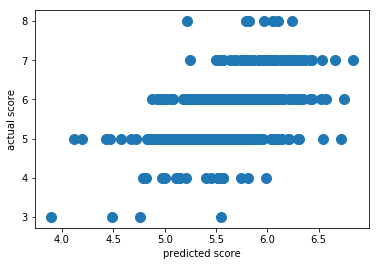

In [37]:
# scatter plot of actual versus predicted
plt.scatter(wineQModel.predict(xTest),yTest,s=100,alpha=1.0)
plt.xlabel('predicted score')
plt.ylabel('actual score')
plt.show()